In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro

In [2]:
df=pd.read_csv('./iq.csv')

In [3]:
df.head()

,IQ,School
0,147.0,2.0
1,140.0,2.0
2,141.0,1.0
3,141.0,1.0
4,142.0,2.0


In [4]:
group1=df[df.School==1.0]
group2=df[df.School==2.0]
group1.head()

,IQ,School
2,141.0,1.0
3,141.0,1.0
5,146.0,1.0
7,146.0,1.0
8,145.0,1.0


In [5]:
mean1=group1.IQ.mean() #149
mean2=group2.IQ.mean() #146.7

In [6]:
res1=group1.IQ - mean1
res2=group2.IQ - mean2

------------------First School------------------

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.10591635942270806
Residuals are normally distributed

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.000939472253955561
Residuals are not normally distributed


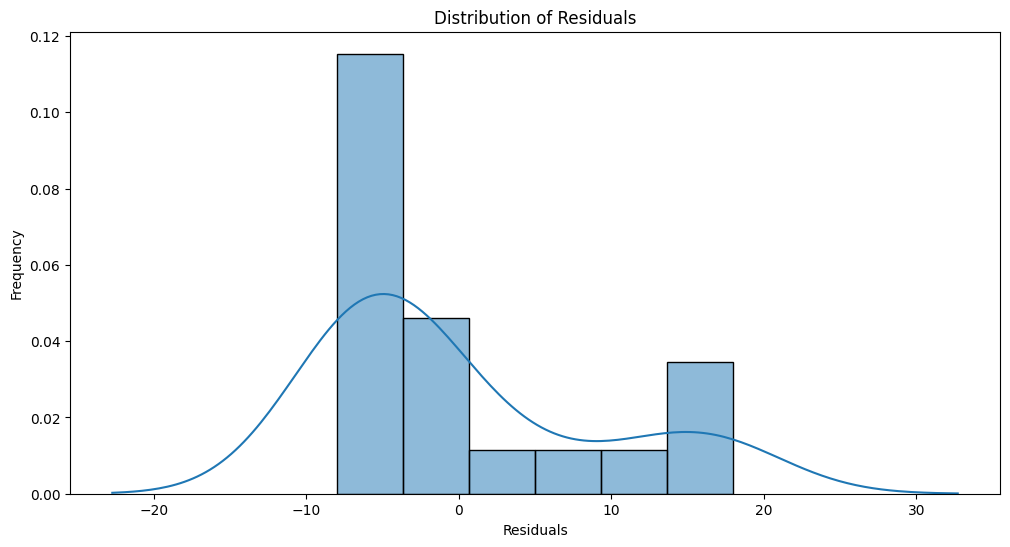


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
------------------Second School------------------

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0003338912169735587
Residuals are not normally distributed

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0037090974862783073
Residuals are not normally distributed


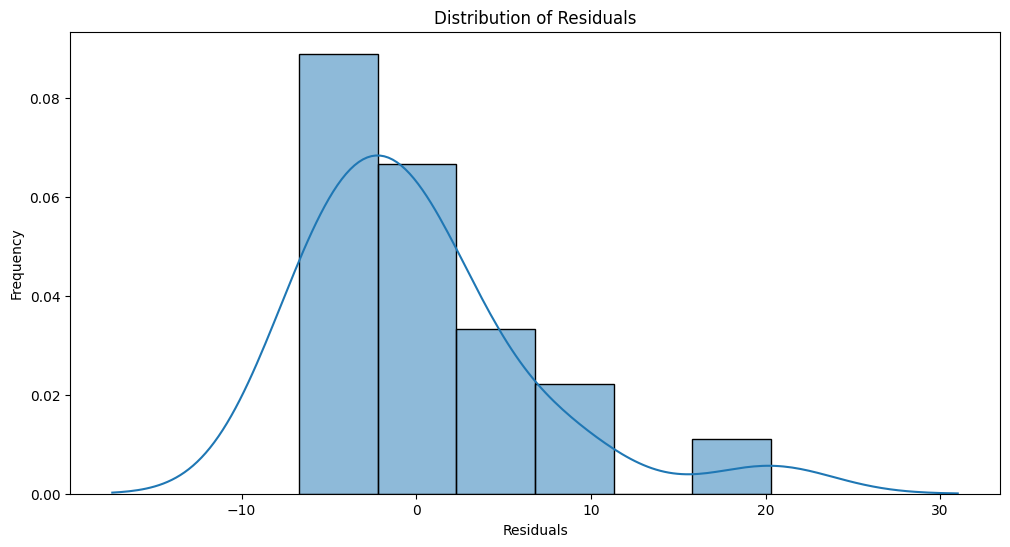


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, shapiro

def check_normality(res, school_name, p_value_thresh=0.05):
    print(f"------------------{school_name}------------------\n")
    
    print('Using the Anderson-Darling test for normal distribution')
    p_value_ad = normaltest(res)[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value_ad)

    if p_value_ad < p_value_thresh:
        print('Residuals are not normally distributed\n')
    else:
        print('Residuals are normally distributed\n')

    print('Using the Shapiro-Wilks test for normal distribution')
    shapiro_test_stat, shapiro_test_pvalue = shapiro(res)
    print('p-value from the test - below 0.05 generally means non-normal:', shapiro_test_pvalue)

    if shapiro_test_pvalue < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')


    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.histplot(res, kde=True,
                 stat="density", kde_kws=dict(cut=3)
                 )
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    print()
    if p_value_ad > p_value_thresh and shapiro_test_pvalue > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

# First school
res1 = res1 # aquí colocarías los residuos para la primera escuela
check_normality(res1, "First School")

# Second school
res2 = res2# aquí colocarías los residuos para la segunda escuela
check_normality(res2, "Second School")
